# Big Mart Sales Prediction

# Problem statement
### The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd
import plotly.express as px

In [2]:
df = pd.read_csv("C:/Users/user/train_bigmart.csv")

In [3]:
dup = df.duplicated()

sum(dup)

0

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Handling the missing values

In [6]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [7]:
missing_value_df

,column_name,percent_missing
Item_Identifier,Item_Identifier,0.000000
Item_Weight,Item_Weight,17.165317
Item_Fat_Content,Item_Fat_Content,0.000000
Item_Visibility,Item_Visibility,0.000000
Item_Type,Item_Type,0.000000
Item_MRP,Item_MRP,0.000000
Outlet_Identifier,Outlet_Identifier,0.000000
Outlet_Establishment_Year,Outlet_Establishment_Year,0.000000
Outlet_Size,Outlet_Size,28.276428
Outlet_Location_Type,Outlet_Location_Type,0.000000


### Outlet size has 28% Null values and Item_Weight 17% Null values

In [8]:
df.Item_Weight.describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

(array([483., 870., 865., 664., 779., 629., 755., 735., 677., 603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <BarContainer object of 10 artists>)

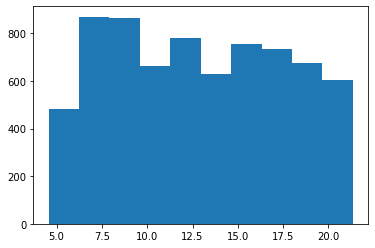

In [9]:
plt.hist(df.Item_Weight)

#### Replacing null values in Item_Weight with mean value

In [10]:
mean = df.Item_Weight.mean()
mean

12.857645184136183

In [11]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [12]:
df.Item_Weight = df.Item_Weight.fillna(mean)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
df.Outlet_Size.unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

<AxesSubplot:>

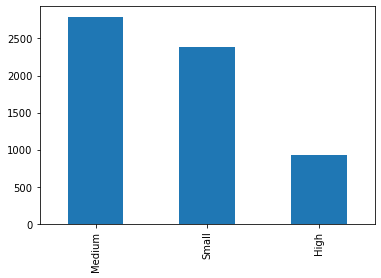

In [15]:
df.Outlet_Size.value_counts().plot(kind = "bar")

In [16]:
dummy = df

In [17]:
dummy.Outlet_Size = dummy.Outlet_Size.fillna(1)

In [18]:
dummy.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [19]:
dummy1 = dummy[dummy.Outlet_Size==1]

In [20]:
dummy1 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,1,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,1,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,1,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,1,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,1,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,1,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,1,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,1,Tier 2,Supermarket Type1,468.7232


In [21]:
dummy1.nunique()

Item_Identifier              1393
Item_Weight                   393
Item_Fat_Content                5
Item_Visibility              2240
Item_Type                      16
Item_MRP                     2178
Outlet_Identifier               3
Outlet_Establishment_Year       3
Outlet_Size                     1
Outlet_Location_Type            2
Outlet_Type                     2
Item_Outlet_Sales            1627
dtype: int64

In [22]:
dummy1.Outlet_Identifier.unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [23]:
dummy1.Outlet_Establishment_Year.unique()

array([1998, 2002, 2007], dtype=int64)

### For missing values on Outlet_Size we will replace the value based on Outlet_Location_Type mode values

In [24]:
dummy1 = df[df.Outlet_Location_Type=="Tier 3"]

In [25]:
dummy1 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
...,...,...,...,...,...,...,...,...,...,...,...,...
8512,FDR26,20.700,Low Fat,0.042801,Dairy,178.3028,OUT013,1987,High,Tier 3,Supermarket Type1,2479.4392
8515,FDH24,20.700,Low Fat,0.021518,Baking Goods,157.5288,OUT018,2009,Medium,Tier 3,Supermarket Type2,1571.2880
8516,NCJ19,18.600,Low Fat,0.118661,Others,58.7588,OUT018,2009,Medium,Tier 3,Supermarket Type2,858.8820
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834


In [26]:
dummy1.Outlet_Size.value_counts()

Medium    1863
High       932
1          555
Name: Outlet_Size, dtype: int64

In [27]:
dummy1[dummy1.Outlet_Size==1].Outlet_Identifier.unique()

array(['OUT010'], dtype=object)

In [28]:
dummy2 = df[df.Outlet_Location_Type=="Tier 2"]

In [29]:
dummy2.Outlet_Size.value_counts()

1        1855
Small     930
Name: Outlet_Size, dtype: int64

In [30]:
dummy2.Outlet_Identifier.value_counts()

OUT035    930
OUT045    929
OUT017    926
Name: Outlet_Identifier, dtype: int64

In [31]:
for i in df.Outlet_Identifier:
    if i == "OUT035":
        df['Outlet_Size'] = df['Outlet_Size'].replace([1],'Small')
    elif i == "OUT045":
        df['Outlet_Size'] = df['Outlet_Size'].replace([1],'Small')
    elif i == "OUT017":
        df['Outlet_Size'] = df['Outlet_Size'].replace([1],'Small')
    elif i == "OUT010":
        df['Outlet_Size'] = df['Outlet_Size'].replace([1],'Medium')

In [32]:
for i in df.Outlet_Identifier:
    if i == "OUT010":
        df['Outlet_Size'] = df['Outlet_Size'].replace(["Small"],'Medium')

In [33]:
df[df.Outlet_Identifier=="OUT010"]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,Medium,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,Medium,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,Medium,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,LF,0.195068,Snack Foods,185.4266,OUT010,1998,Medium,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
8400,NCE07,8.180,Low Fat,0.021977,Household,140.6154,OUT010,1998,Medium,Tier 3,Grocery Store,425.4462
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,Medium,Tier 3,Grocery Store,159.7920
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,Medium,Tier 3,Grocery Store,431.4384
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,Medium,Tier 3,Grocery Store,45.2744


In [34]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [35]:
Item_Identifier = df.groupby("Item_Identifier").sum()

In [36]:
Item_Identifier

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Identifier,,,,,
DRA12,69.600000,0.191737,851.1924,12007,11061.6012
DRA24,122.465290,0.336436,1148.6076,13965,15723.5328
DRA59,75.335290,1.077744,1481.4392,15967,20915.4412
DRB01,27.637645,0.246379,568.7590,5971,4554.0720
DRB13,30.575000,0.040012,948.4650,9995,12144.1920
...,...,...,...,...,...
NCZ30,52.397645,0.174693,845.2686,13982,12653.5290
NCZ41,99.250000,0.258114,628.1520,10009,9137.4392
NCZ42,52.500000,0.045222,1183.2240,9995,19199.0088


In [37]:
Item_Identifier[Item_Identifier["Outlet_Establishment_Year"] <= 2].count()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

In [38]:
Item_Identifier[Item_Identifier["Outlet_Establishment_Year"] > 5].count()

Item_Weight                  1559
Item_Visibility              1559
Item_MRP                     1559
Outlet_Establishment_Year    1559
Item_Outlet_Sales            1559
dtype: int64

In [39]:
df.shape

(8523, 12)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [41]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [42]:
df.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [43]:
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     2
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [44]:
df = df

In [45]:
df.Outlet_Size.unique()

array(['Medium', 'High'], dtype=object)

In [46]:
ka = df.Outlet_Size.fillna

In [47]:
ka = df[df.Outlet_Size=="nan"]

In [48]:
ka.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            0 non-null      object 
 1   Item_Weight                0 non-null      float64
 2   Item_Fat_Content           0 non-null      object 
 3   Item_Visibility            0 non-null      float64
 4   Item_Type                  0 non-null      object 
 5   Item_MRP                   0 non-null      float64
 6   Outlet_Identifier          0 non-null      object 
 7   Outlet_Establishment_Year  0 non-null      int64  
 8   Outlet_Size                0 non-null      object 
 9   Outlet_Location_Type       0 non-null      object 
 10  Outlet_Type                0 non-null      object 
 11  Item_Outlet_Sales          0 non-null      float64
dtypes: float64(4), int64(1), object(7)
memory usage: 0.0+ bytes


# Item_Fat_Content

In [49]:
df.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

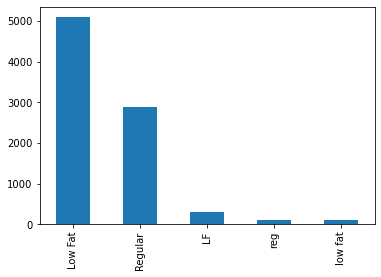

In [50]:
df.Item_Fat_Content.value_counts().plot(kind = "bar")
df.Item_Fat_Content.value_counts()


In [51]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [52]:
mode = ols("Item_Outlet_Sales  ~ Item_Fat_Content ", data = df).fit()
sm.stats.anova_lm(mode)

,df,sum_sq,mean_sq,F,PR(>F)
Item_Fat_Content,4.0,2.009519e+07,5.023797e+06,1.725709,0.141221
Residual,8518.0,2.479717e+10,2.911149e+06,NaN,NaN


### Adding Item_Fat_Content in model will not make any sensce

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of Item_Visibility')

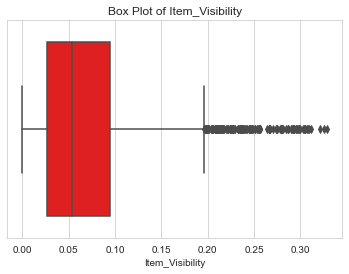

In [53]:
import seaborn as sns
sns.set_style('whitegrid')
sns.boxplot(df.Item_Visibility, color = 'r')
plt.title('Box Plot of Item_Visibility')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Item_Visibility')

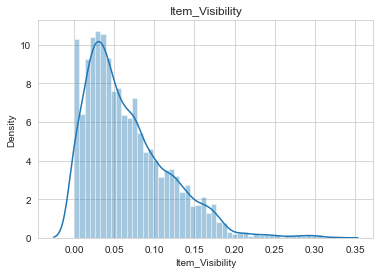

In [54]:
sns.distplot(df.Item_Visibility)
plt.title('Item_Visibility')

In [55]:
# There are lot of ouliers Item_Visibility

In [56]:
df.Item_Visibility.describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [57]:
IQR = df.Item_Visibility.quantile(0.75)-df.Item_Visibility.quantile(0.25)
upper_limit = df.Item_Visibility.quantile(0.75) + (1.5*IQR)
lower_limit = df.Item_Visibility.quantile(0.25) - (1.5*IQR)
print(upper_limit,lower_limit )

0.195979015 -0.07440424500000001


In [58]:
df[df["Item_Visibility"]>upper_limit].count()

Item_Identifier              144
Item_Weight                  144
Item_Fat_Content             144
Item_Visibility              144
Item_Type                    144
Item_MRP                     144
Outlet_Identifier            144
Outlet_Establishment_Year    144
Outlet_Size                  144
Outlet_Location_Type         144
Outlet_Type                  144
Item_Outlet_Sales            144
dtype: int64

In [59]:
df["Item_Visibility"] = np.where(df["Item_Visibility"] > upper_limit,upper_limit,df["Item_Visibility"])
df["Item_Visibility"]  = np.where(df["Item_Visibility"] < lower_limit,lower_limit,df["Item_Visibility"])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of Outlet_Sales')

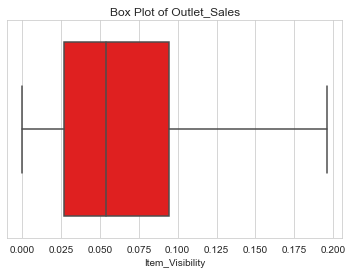

In [60]:
sns.set_style('whitegrid')
sns.boxplot(df.Item_Visibility, color = 'r')
plt.title('Box Plot of Outlet_Sales')

In [61]:
Item_Visibility = df.groupby("Outlet_Identifier")["Item_Visibility"]

In [62]:
Item_Visibility.describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,555.0,0.096172,0.061616,0.0,0.044024,0.088258,0.146837,0.195979
OUT013,932.0,0.059957,0.044235,0.0,0.026109,0.049587,0.086466,0.185705
OUT017,926.0,0.061377,0.044643,0.0,0.026953,0.050345,0.089545,0.188620
OUT018,928.0,0.061014,0.045386,0.0,0.025861,0.049124,0.090376,0.188323
OUT019,528.0,0.100679,0.063928,0.0,0.046488,0.094019,0.159171,0.195979
OUT027,935.0,0.058615,0.043147,0.0,0.026057,0.048427,0.082521,0.183948
OUT035,930.0,0.061263,0.044271,0.0,0.025970,0.053688,0.089054,0.187523
OUT045,929.0,0.060474,0.044930,0.0,0.025460,0.049820,0.088172,0.187939
OUT046,930.0,0.060464,0.044616,0.0,0.025929,0.048723,0.089116,0.187559


In [63]:
df.Item_Type

0                       Dairy
1                 Soft Drinks
2                        Meat
3       Fruits and Vegetables
4                   Household
                ...          
8518              Snack Foods
8519             Baking Goods
8520       Health and Hygiene
8521              Snack Foods
8522              Soft Drinks
Name: Item_Type, Length: 8523, dtype: object

In [64]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

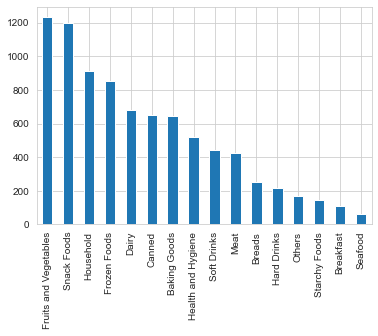

In [65]:
df.Item_Type.value_counts().plot(kind = "bar")
df.Item_Type.value_counts()

In [66]:
mode = ols("Item_Outlet_Sales  ~ Item_Type ", data = df).fit()
sm.stats.anova_lm(mode)

,df,sum_sq,mean_sq,F,PR(>F)
Item_Type,15.0,1.176182e+08,7.841211e+06,2.700653,0.000388
Residual,8507.0,2.469965e+10,2.903450e+06,NaN,NaN


In [67]:
df1 = df.drop(["Item_Fat_Content"], axis = 1)

In [68]:
df1

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,0.035186,Health and Hygiene,85.1224,OUT035,2004,Medium,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [69]:
df1.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.065307,140.992782,1997.831867,2181.288914
std,4.226124,0.048841,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.195979,266.888400,2009.000000,13086.964800


In [70]:
df1.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Visibility              7737
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     2
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

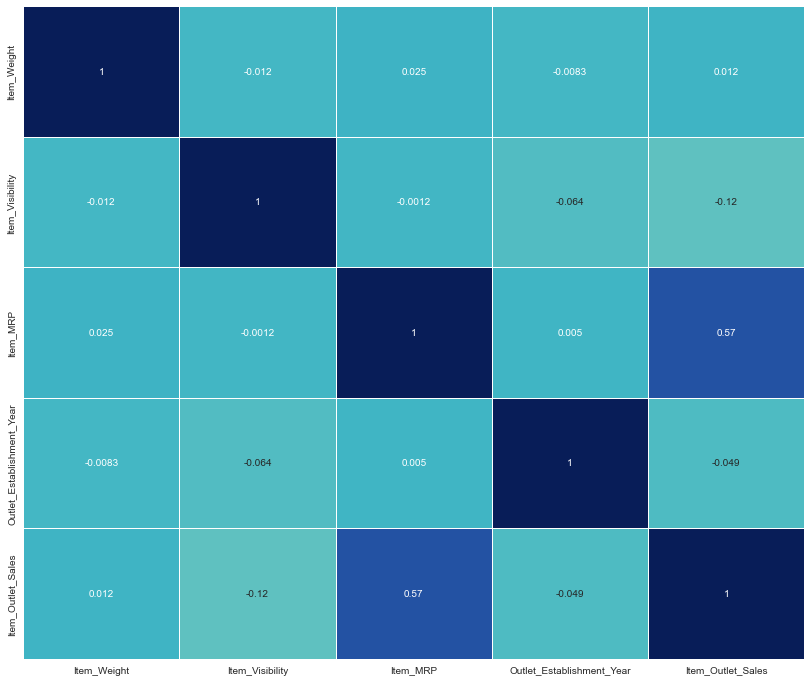

In [71]:
import seaborn as sns
plt.figure(figsize = (14, 12))
sns.heatmap(df.corr(), annot = True, linewidth = .5, center = 0, cbar = False, cmap = 'YlGnBu')
plt.show()

In [72]:
df1.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [73]:
df1.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean()

Outlet_Identifier
OUT010     339.351662
OUT013    2298.995256
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3694.038558
OUT035    2438.841866
OUT045    2192.384798
OUT046    2277.844267
OUT049    2348.354635
Name: Item_Outlet_Sales, dtype: float64

<AxesSubplot:>

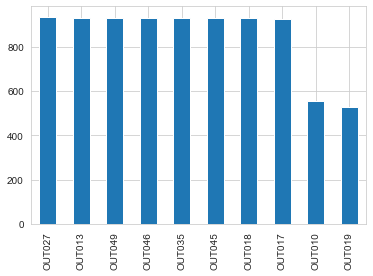

In [74]:
df1.Outlet_Identifier.value_counts().plot(kind='bar')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normality of age')

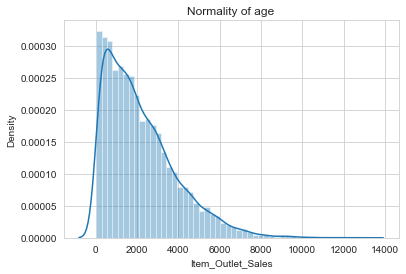

In [75]:
sns.distplot(df1.Item_Outlet_Sales)
plt.title('Normality of age')

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [77]:
df1.Item_Visibility.describe()

count    8523.000000
mean        0.065307
std         0.048841
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.195979
Name: Item_Visibility, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of Item_Visibility')

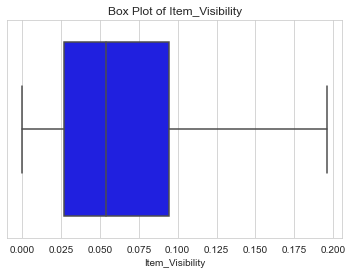

In [78]:
sns.set_style('whitegrid')
sns.boxplot(df1.Item_Visibility, color = 'b')
plt.title('Box Plot of Item_Visibility')

In [79]:
# There are outliers in Item_Outlet_Sales so removing the outliers from the dataset

In [80]:
IQR = df1.Item_Outlet_Sales.quantile(0.75)-df1.Item_Outlet_Sales.quantile(0.25)
upper_limit = df1.Item_Outlet_Sales.quantile(0.75) + (1.5*IQR)
lower_limit = df1.Item_Outlet_Sales.quantile(0.25) - (1.5*IQR)
print(upper_limit,lower_limit )

6501.8699 -2566.3261


In [81]:
df1[df1["Item_Outlet_Sales"]>6501.8699].count()

Item_Identifier              186
Item_Weight                  186
Item_Visibility              186
Item_Type                    186
Item_MRP                     186
Outlet_Identifier            186
Outlet_Establishment_Year    186
Outlet_Size                  186
Outlet_Location_Type         186
Outlet_Type                  186
Item_Outlet_Sales            186
dtype: int64

In [82]:
df1.shape

(8523, 11)

In [83]:
df2 = df1[~(df1["Item_Outlet_Sales"]>=6501.8699)]

In [84]:
df2.shape

(8337, 11)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of Outlet_Sales')

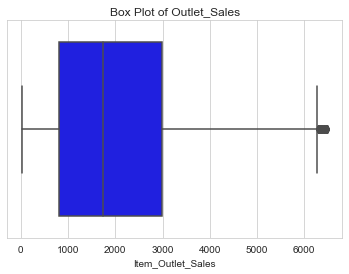

In [85]:
sns.set_style('whitegrid')
sns.boxplot(df2.Item_Outlet_Sales, color = 'b')
plt.title('Box Plot of Outlet_Sales')

In [86]:
k2 = df2.groupby("Outlet_Identifier")["Item_Outlet_Sales"]

In [87]:
k2.describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,555.0,339.351662,271.014855,33.2900,154.13270,250.3408,455.40720,1775.6886
OUT013,917.0,2217.100205,1398.677744,73.2380,1057.95620,2014.7108,3103.95960,6474.2392
OUT017,907.0,2233.103477,1368.939423,143.8128,1174.47120,1970.7680,3029.39000,6471.5760
OUT018,925.0,1980.230278,1351.714417,69.2432,980.05760,1651.1840,2687.83460,6439.6176
OUT019,528.0,340.329723,249.979449,33.9558,153.63335,265.3213,460.73360,1482.0708
OUT027,832.0,3174.872101,1564.822218,241.6854,1868.06835,3098.6332,4376.96920,6478.2340
OUT035,914.0,2356.620225,1417.754807,113.8518,1235.05900,2090.9449,3233.29125,6474.2392
OUT045,920.0,2137.772351,1357.869542,99.8700,1062.61680,1818.9656,2893.56680,6426.3016
OUT046,920.0,2219.794569,1384.221202,101.8674,1124.03685,1924.8278,3063.17935,6308.4550


In [88]:
k2 = df2.groupby("Outlet_Identifier")["Item_Outlet_Sales"]

In [89]:
def remove_pps_outliers(df1):
    df_out = pd.DataFrame()
    for key, subdf in df1.groupby('Outlet_Identifier'):
        m = np.mean(subdf.Item_Outlet_Sales)
        st = np.std(subdf.Item_Outlet_Sales)
        reduced_df = subdf[(subdf.Item_Outlet_Sales>(m-st)) & (subdf.Item_Outlet_Sales<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4 = remove_pps_outliers(df1)
df4.shape

(6011, 11)

In [90]:
r = df4.groupby("Outlet_Identifier")["Item_Outlet_Sales"]
r.describe()

,count,mean,std,min,25%,50%,75%,max
Outlet_Identifier,,,,,,,,
OUT010,450.0,267.775883,143.013065,70.5748,157.12880,225.7062,376.50990,596.5568
OUT013,640.0,2149.545703,844.641636,772.3280,1469.75350,2078.6276,2850.28980,3795.0600
OUT017,652.0,2094.552678,812.448498,792.3020,1412.16180,1988.7446,2697.48870,3844.9950
OUT018,647.0,1755.822651,717.449150,628.5152,1177.80020,1631.8758,2291.68360,3367.6164
OUT019,406.0,286.412073,136.583788,91.8804,171.27705,254.3356,385.49820,589.2330
OUT027,628.0,3457.402923,1165.681335,1569.9564,2469.45220,3366.9506,4377.13565,5816.4288
OUT035,626.0,2198.780038,812.065906,904.1564,1488.22945,2093.9410,2822.49265,3970.8312
OUT045,669.0,1936.634056,797.023678,731.0484,1267.01740,1798.9916,2591.29360,3644.5892
OUT046,654.0,2013.540051,806.941190,790.9704,1312.79115,1904.1880,2652.21430,3749.7856


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of Outlet_Sales')

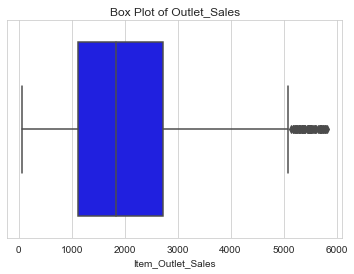

In [91]:
sns.set_style('whitegrid')
sns.boxplot(df4.Item_Outlet_Sales, color = 'b')
plt.title('Box Plot of Outlet_Sales')

In [92]:
df5 = remove_pps_outliers(df4)
df5.shape

(3648, 11)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normality of age')

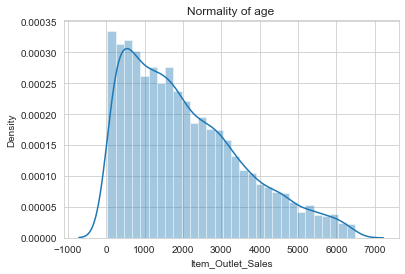

In [93]:
sns.distplot(df2.Item_Outlet_Sales)
plt.title('Normality of age')

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normality of age')

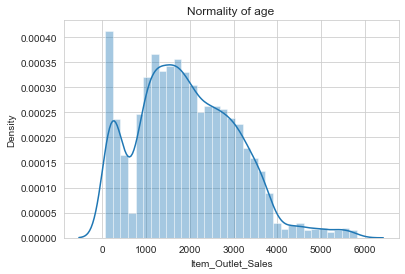

In [94]:
sns.distplot(df4.Item_Outlet_Sales)
plt.title('Normality of age')

In [95]:
df4

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDE51,5.925,0.161467,Dairy,45.5086,OUT010,1998,Medium,Tier 3,Grocery Store,178.4344
1,FDV38,19.250,0.170349,Dairy,55.7956,OUT010,1998,Medium,Tier 3,Grocery Store,163.7868
2,FDM39,6.420,0.089499,Dairy,178.1002,OUT010,1998,Medium,Tier 3,Grocery Store,358.2004
3,FDC46,17.700,0.195068,Snack Foods,185.4266,OUT010,1998,Medium,Tier 3,Grocery Store,184.4266
4,FDW20,20.750,0.040421,Fruits and Vegetables,122.1730,OUT010,1998,Medium,Tier 3,Grocery Store,369.5190
...,...,...,...,...,...,...,...,...,...,...,...
6006,FDP39,12.650,0.069533,Meat,51.8324,OUT049,1999,Medium,Tier 1,Supermarket Type1,1090.5804
6007,FDX15,17.200,0.156542,Meat,162.4578,OUT049,1999,Medium,Tier 1,Supermarket Type1,2888.2404
6008,FDK21,7.905,0.010028,Snack Foods,249.6408,OUT049,1999,Medium,Tier 1,Supermarket Type1,3254.4304
6009,FDW27,5.860,0.151088,Meat,155.1314,OUT049,1999,Medium,Tier 1,Supermarket Type1,1551.3140


In [96]:
df4.Item_MRP.describe()

count    6011.000000
mean      139.966219
std        53.668159
min        32.055800
25%       100.102900
50%       140.383800
75%       177.434400
max       266.888400
Name: Item_MRP, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Box Plot of Outlet_Sales')

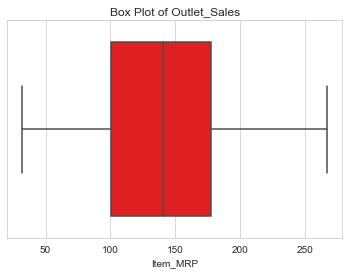

In [97]:
sns.set_style('whitegrid')
sns.boxplot(df4.Item_MRP, color = 'r')
plt.title('Box Plot of Outlet_Sales')

In [98]:
Item_Type = df4.groupby("Item_Type")["Item_Outlet_Sales"]

In [99]:
df4.shape

(6011, 11)

In [100]:
Item_Type.describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,465.0,1844.649730,1116.627880,88.5514,1057.95620,1733.7432,2579.97500,5681.2714
Breads,184.0,1939.482637,1101.287627,91.8804,1090.08105,1860.2452,2688.00105,5685.9320
Breakfast,65.0,1792.016065,1026.330397,110.5228,1151.16820,1764.3700,2460.79680,3874.2902
Canned,480.0,1966.169819,1127.567639,87.2198,1193.94585,1848.9266,2745.09340,5734.5354
Dairy,455.0,1833.499063,1105.506377,81.2276,1066.61160,1657.8420,2595.95420,5695.2532
Frozen Foods,577.0,1875.915155,1131.239783,75.9012,1039.97960,1765.7016,2609.93600,5806.4418
Fruits and Vegetables,890.0,1936.450124,1183.716626,82.5592,1117.04595,1769.6964,2759.07520,5779.1440
Hard Drinks,151.0,1962.831311,1127.270261,71.9064,1186.45560,1829.6184,2882.24820,5448.9072
Health and Hygiene,377.0,1965.452196,1112.270638,70.5748,1150.50240,1950.7940,2759.07520,5704.5744


In [101]:
mode = ols("Item_Outlet_Sales  ~ Outlet_Establishment_Year ", data = df4).fit()
sm.stats.anova_lm(mode)

,df,sum_sq,mean_sq,F,PR(>F)
Outlet_Establishment_Year,1.0,4.891924e+07,4.891924e+07,38.158422,6.950070e-10
Residual,6009.0,7.703560e+09,1.282004e+06,NaN,NaN


<AxesSubplot:>

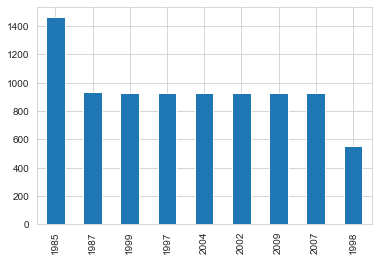

In [102]:
df.Outlet_Establishment_Year.value_counts().plot(kind='bar')

### Tier 3 making the high number of sales

### Outlet_Location_Type

<AxesSubplot:>

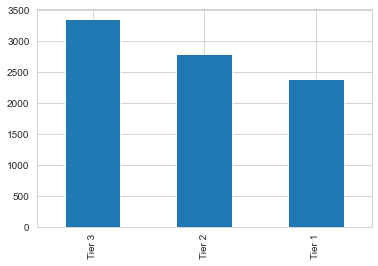

In [103]:
df.Outlet_Location_Type.value_counts().plot(kind='bar')

In [104]:
mode = ols("Item_Outlet_Sales  ~ Outlet_Location_Type", data = df4).fit()
sm.stats.anova_lm(mode)

,df,sum_sq,mean_sq,F,PR(>F)
Outlet_Location_Type,2.0,2.085820e+08,1.042910e+08,83.057901,2.618665e-36
Residual,6008.0,7.543897e+09,1.255642e+06,NaN,NaN


In [105]:
mode = ols("Item_Outlet_Sales  ~ Outlet_Location_Type", data = df4).fit()
sm.stats.anova_lm(mode)

,df,sum_sq,mean_sq,F,PR(>F)
Outlet_Location_Type,2.0,2.085820e+08,1.042910e+08,83.057901,2.618665e-36
Residual,6008.0,7.543897e+09,1.255642e+06,NaN,NaN


## Outlet_Type

<AxesSubplot:>

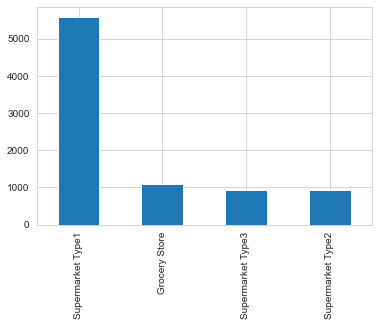

In [106]:
df.Outlet_Type.value_counts().plot(kind='bar')

In [107]:

mode = ols("Item_Outlet_Sales  ~ Outlet_Size", data = df4).fit()
sm.stats.anova_lm(mode)

,df,sum_sq,mean_sq,F,PR(>F)
Outlet_Size,1.0,3.328290e+07,3.328290e+07,25.909038,3.687770e-07
Residual,6009.0,7.719196e+09,1.284606e+06,NaN,NaN


# b. Label Encoding wherever required

In [108]:
cat = df2.select_dtypes('O')
cat.columns

Index(['Item_Identifier', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [109]:
cat = df2[['Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type',"Outlet_Establishment_Year","Outlet_Size"]]

In [110]:
from sklearn import preprocessing

label_e = preprocessing.LabelEncoder()

In [111]:
cat

,Item_Identifier,Item_Type,Outlet_Identifier,Outlet_Location_Type,Outlet_Type,Outlet_Establishment_Year,Outlet_Size
0,FDA15,Dairy,OUT049,Tier 1,Supermarket Type1,1999,Medium
1,DRC01,Soft Drinks,OUT018,Tier 3,Supermarket Type2,2009,Medium
2,FDN15,Meat,OUT049,Tier 1,Supermarket Type1,1999,Medium
3,FDX07,Fruits and Vegetables,OUT010,Tier 3,Grocery Store,1998,Medium
4,NCD19,Household,OUT013,Tier 3,Supermarket Type1,1987,High
...,...,...,...,...,...,...,...
8518,FDF22,Snack Foods,OUT013,Tier 3,Supermarket Type1,1987,High
8519,FDS36,Baking Goods,OUT045,Tier 2,Supermarket Type1,2002,Medium
8520,NCJ29,Health and Hygiene,OUT035,Tier 2,Supermarket Type1,2004,Medium
8521,FDN46,Snack Foods,OUT018,Tier 3,Supermarket Type2,2009,Medium


In [112]:
for col in cat:
    df2[col] = label_e.fit_transform(df2[col])

C:\Users\user\AppData\Local\Temp\ipykernel_6484\1989538220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[col] = label_e.fit_transform(df2[col])


In [113]:
df2

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,0.016047,4,249.8092,9,4,1,0,1,3735.1380
1,8,5.920,0.019278,14,48.2692,3,8,1,2,2,443.4228
2,662,17.500,0.016760,10,141.6180,9,4,1,0,1,2097.2700
3,1121,19.200,0.000000,6,182.0950,0,3,1,2,0,732.3800
4,1297,8.930,0.000000,9,53.8614,1,1,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,0.056783,13,214.5218,1,1,0,2,1,2778.3834
8519,897,8.380,0.046982,0,108.1570,7,5,1,1,1,549.2850
8520,1357,10.600,0.035186,8,85.1224,6,6,1,1,1,1193.1136
8521,681,7.210,0.145221,13,103.1332,3,8,1,2,2,1845.5976


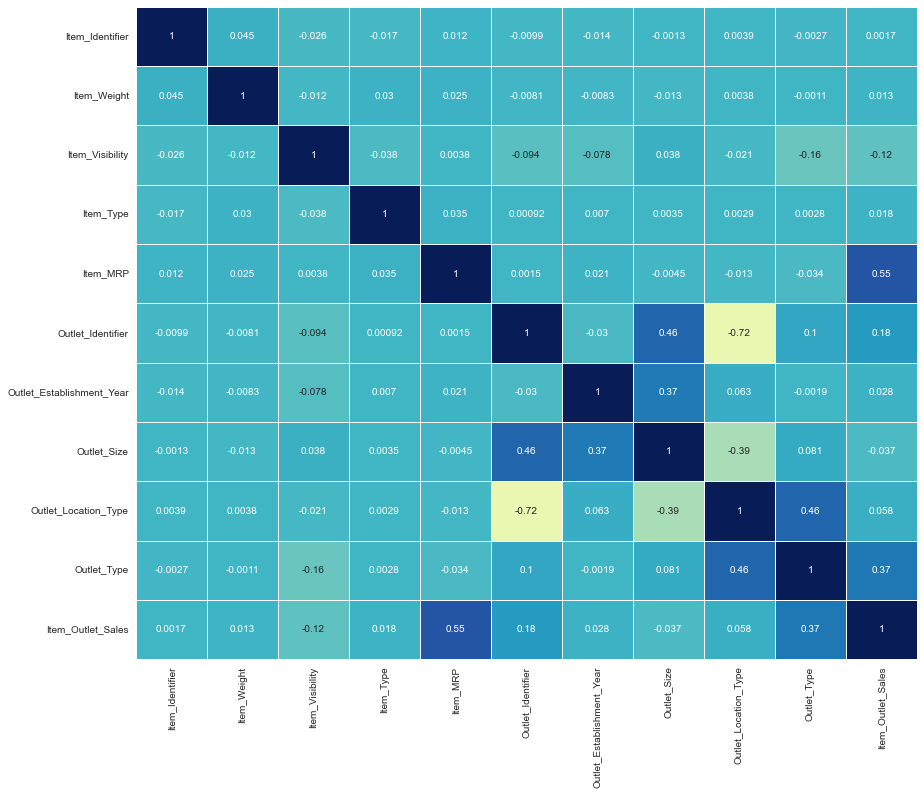

In [114]:
plt.figure(figsize = (14, 12))
sns.heatmap(df2.corr(), annot = True, linewidth = .5, center = 0, cbar = False, cmap = 'YlGnBu')
plt.show()

In [115]:
from sklearn.preprocessing import StandardScaler

In [116]:
df2.shape

(8337, 11)

# Finding the right model

In [136]:
x = df2.drop(['Item_Outlet_Sales',"Item_Weight","Outlet_Size"], axis = 1)
y = df2.Item_Outlet_Sales

In [137]:
x

,Item_Identifier,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,156,0.016047,4,249.8092,9,4,0,1
1,8,0.019278,14,48.2692,3,8,2,2
2,662,0.016760,10,141.6180,9,4,0,1
3,1121,0.000000,6,182.0950,0,3,2,0
4,1297,0.000000,9,53.8614,1,1,2,1
...,...,...,...,...,...,...,...,...
8518,370,0.056783,13,214.5218,1,1,2,1
8519,897,0.046982,0,108.1570,7,5,1,1
8520,1357,0.035186,8,85.1224,6,6,1,1
8521,681,0.145221,13,103.1332,3,8,2,2


In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,train_size=0.7)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print("Coefficient", lm.coef_ , "intercept", lm.intercept_)
print("The R_square is: ", round(lm.score (X_train,y_train),3))

Coefficient [-1.13217352e-03 -1.68221731e+03 -2.19719338e+00  1.38137660e+01
  5.75758147e+01  9.70795856e+00 -6.93125231e+01  7.52768070e+02] intercept -861.5918819551425
The R_square is:  0.488


In [139]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
clg = lm.fit(X_train,y_train)
lm.score(X_train,y_train)
lm.score(X_test,y_test)

0.46976289554069983

# Buliding models

In [140]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression


In [141]:
from sklearn.ensemble import RandomForestRegressor

RandomForest_model=RandomForestRegressor(n_estimators=1000)
RandomForest_model.fit(X_train,y_train)
accuracy=RandomForest_model.score(X_test,y_test)
accuracy_train = RandomForest_model.score(X_train,y_train)
print(accuracy,accuracy_train)

0.5406329437381407 0.9381858292597127


In [142]:
from sklearn.tree import DecisionTreeRegressor

DecisionTree_model=DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)
accuracy=DecisionTree_model.score(X_test,y_test)
accuracy_train = DecisionTree_model.score(X_train,y_train)
print(accuracy,accuracy_train)

0.1665172677652096 1.0


In [143]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'poly')
regressor.fit(X_train,y_train)
train = regressor.score(X_train, y_train)
test = regressor.score(X_test, y_test)
print(train,test)

-0.006350462960524217 -0.010067786629264663


In [144]:
X = x

In [145]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = m

,model,best_score,best_params
0,linear_regression,0.476526,{'normalize': False}
1,lasso,0.476161,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.144072,"{'criterion': 'friedman_mse', 'splitter': 'ran..."


### RandomForest model gives high accuracy of 54% 

In [146]:
RandomForest_model=RandomForestRegressor()
k = RandomForest_model.fit(x,y)
accuracy_train = RandomForest_model.score(x,y)
print(accuracy_train)

0.9359681912528871


In [147]:
test = pd.read_csv("test_bigmart.csv")

In [148]:
test1 = test[["Item_Identifier","Outlet_Identifier"]]

In [149]:
test1.head()

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


In [150]:
cat = test[['Item_Identifier', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Location_Type', 'Outlet_Type']]
from sklearn import preprocessing

label_e = preprocessing.LabelEncoder()

In [151]:
for col in cat:
    test[col] = label_e.fit_transform(test[col])

In [152]:
test1

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027
...,...,...
5676,FDB58,OUT046
5677,FDD47,OUT018
5678,NCO17,OUT045
5679,FDJ26,OUT017


In [153]:
df_test = test.drop(["Outlet_Size","Item_Weight","Item_Fat_Content",], axis = 1)
x = df_test

In [154]:
result = k.predict(x)
result

array([1539.12986 , 1262.450012,  653.24967 , ..., 1996.088374,
       3730.17779 , 1405.850016])

In [155]:
test1["Item_Outlet_Sales"] = result

C:\Users\user\AppData\Local\Temp\ipykernel_6484\3779115773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1["Item_Outlet_Sales"] = result


In [156]:
test1

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1539.129860
1,FDW14,OUT017,1262.450012
2,NCN55,OUT010,653.249670
3,FDQ58,OUT017,2538.708716
4,FDY38,OUT027,4760.223654
...,...,...,...
5676,FDB58,OUT046,2331.312016
5677,FDD47,OUT018,2767.477596
5678,NCO17,OUT045,1996.088374
5679,FDJ26,OUT017,3730.177790


In [157]:
end_result = test1[["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"]]

In [158]:
end_result

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1539.129860
1,FDW14,OUT017,1262.450012
2,NCN55,OUT010,653.249670
3,FDQ58,OUT017,2538.708716
4,FDY38,OUT027,4760.223654
...,...,...,...
5676,FDB58,OUT046,2331.312016
5677,FDD47,OUT018,2767.477596
5678,NCO17,OUT045,1996.088374
5679,FDJ26,OUT017,3730.177790


In [159]:
end_result.to_csv("C:/Users/user/big_mart_end_resultsss.csv", index = False)

#                                           Thankyou